In [1]:
import numpy as np
import mynn
import matplotlib.pyplot as plt
%matplotlib notebook


In [2]:
L = 100
W = 100

In [20]:
def CleanData(x):
    '''
    Cleans the picture data so that it is compatable with the model
    It forces the picture to have 3 dimensions, the last two are padded or cut to [X,1024,1024]
    It turns a gray scale into a colored image
    
    Parameter
    ---------
    X is a numpy array [3,L,W] or [1,L,W]
    
    Output
    ---------
    Y a numpy array [3, 1024, 1024]
    3 represents the RGB value
    1024 represents the length of the picture
    768 represents the width of the picture
    '''
    assert isinstance(x, np.ndarray) , "You need your picture data to be a numpy array"
    assert len(x.shape)==3, "Your picture data is messed up for some reason there are a different number of dimensions"
    #C/H/L
    if x.shape == (3,1024,1024):#CHANGE
        #Your data fits the requirements
        return x    
    if x.shape[1]<1024:
        dummy = np.zeros((x.shape[0],1024,x.shape[2]))
        dummy[:x.shape[0],:x.shape[1],:x.shape[2]] = x
        x = dummy
    if x.shape[2]<1024:
        dummy = np.zeros((x.shape[0],x.shape[1],1024))
        dummy[:x.shape[0],:x.shape[1],:x.shape[2]] = x
        x = dummy
    if x.shape[0]<3: #Meaning this is a noncolored image
        print (f"The original color channel was{x.shape[0]}")
        dummy = np.zeroes((3,x.shape[1],x.shape[2]))
        dummy[:x.shape[0],:x.shape[1],:x.shape[2]] = x
        x = dummy
        
    
    
    if x.shape[1]>1024 or x.shape[2] >1024: #Cut off function
        x = x[:x.shape[0],:1024,:1024]
    
    
    
    
    
    
    
    
    #if x.shape[1]<1024: #length
     #   x1 = 1024 - x.shape[1]
      #  add= np.zeros((3,x1,x.shape[2]))
       # x= np.vstack((x,add))
    #if x.shape[2]<1024: #width
     #   x2 = 1024- x.shape[2]
      #  add = np.zeros((3,x.shape[1],x2))
        #x= np.hstack((x,add))
    
    assert x.shape == (3,1024,1024), "For some reason your data cant be cleaned"
    print(f"Your shape is {x.shape}")
    return x

In [22]:
def CleanData2(x):
    '''
    Cleans the picture data so that it is compatable with the model
    It forces the picture to have 3 dimensions, the last two are padded or cut to [X,1024,1024]
    It turns a gray scale into a colored image
    
    Parameter
    ---------
    X is a numpy array [3,L,W] or [1,L,W]
    
    Output
    ---------
    Y a numpy array [3, 1024, 1024]
    3 represents the RGB value
    1024 represents the length of the picture
    768 represents the width of the picture
    
    IMPORTANT this was just a quick test for optimization
    
    '''
    assert isinstance(x, np.ndarray) , "You need your picture data to be a numpy array"
    assert len(x.shape)==3, "Your picture data is messed up for some reason there are a different number of dimensions"
    #C/H/L
    dummy = np.zeros((3,1024,1024))
    dummy[:3,:1024,:1024] = x
    return dummy

In [24]:
#TEST CELL



#x= np.array(([1,2,3],[1,2,3]))
x = np.arange(3*1024*1024)
x=np.reshape(x,[3,1024,1024])
x= CleanData(x)
print(x[2,1023])

#print((np.pad(x,2,mode='constant')).shape)

[3144704 3144705 3144706 ... 3145725 3145726 3145727]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 1024, 3)
[[[      0       1       2 ...    1021    1022    1023]
  [   1024    1025    1026 ...    2045    2046    2047]
  [   2048    2049    2050 ...    3069    3070    3071]
  ...
  [1045504 1045505 1045506 ... 1046525 1046526 1046527]
  [1046528 1046529 1046530 ... 1047549 1047550 1047551]
  [1047552 1047553 1047554 ... 1048573 1048574 1048575]]

 [[1048576 1048577 1048578 ... 1049597 1049598 1049599]
  [1049600 1049601 1049602 ... 1050621 1050622 1050623]
  [1050624 1050625 1050626 ... 1051645 1051646 1051647]
  ...
  [2094080 2094081 2094082 ... 2095101 2095102 2095103]
  [2095104 2095105 2095106 ... 2096125 2096126 2096127]
  [2096128 2096129 2096130 ... 2097149 2097150 2097151]]

 [[2097152 2097153 2097154 ... 2098173 2098174 2098175]
  [2098176 2098177 2098178 ... 2099197 2099198 2099199]
  [2099200 2099201 2099202 ... 2100221 2100222 2100223]
  ...
  [3142656 3142657 3142658 ... 3143677 3143678 3143679]
  [3143680 3143681 3143682 ... 3144701 3144702 3144703]
  [3144704

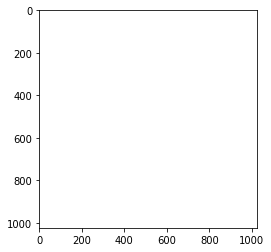

In [37]:
#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print(x.transpose((1,2, 0)).shape)
imgplot = plt.imshow(x.transpose((1,2, 0)))
print(x)

In [38]:
#What is the size?
#AFTER IMPORT
#data = 
#print(f"image size {data.size} ")

In [39]:
def ConvertImtoNdArray (image):
    return image.flatten().astype(np.float32)-np.mean(image)/np.std(image)
#we want to flatten the array so that we can have one input layer. Subtracting by the mean then dividing by the std makes it normalized. The float is for precision by we dont want to much precision, so 32 is used.
# Sould be uppercase pi (index)
#

In [1]:
from mynn.activations.relu import relu
from mynn.initializers.glorot_uniform import glorot_uniform
from mynn.layers.dense import dense
from mynn.layers.conv import conv
from mynn.layers.dropout import dropout

class ModelT:
    
    def __init__(self):
        '''The initial state of the model
        '''
        init_kwargs = {'gain': np.sqrt(2)} #MIGHT CHANGE
        
        
        #As a reminder conv = conv(Input as in color channels, Psuedo Output, Fliter length, Filter width, Stride =1)
        #conv2 = conv(Psuedo Output/Input, )
        #If we input an array with Pic L, Pic W, 1(channel) then if our first conv has filters of length 5 our new array is (Pic L - Fil L +1, Pic W - Fil W +1, 1) 
        #Max Pooling divides Pic L and Pic W by 2
        
        self.conv1 = conv(3, 21, 513, 256, stride=(1,1) 
                          weight_initializer=glorot_uniform, 
                          weight_kwargs=init_kwargs)
        self.conv2 = conv(21, 10, 257, 98 , stride =(1,2)
                          weight_initializer=glorot_uniform, 
                          weight_kwargs=init_kwargs)
        self.conv3 = conv(10, 7, 80, 36 , stride =(16,4)
                          weight_initializer=glorot_uniform, 
                          weight_kwargs=init_kwargs)
        self.dense1 = dense(210, ljkjlhl, 
                            weight_initializer=glorot_uniform, 
                            weight_kwargs=init_kwargs)
        self.dense2 = dense(20, 10, 
                            weight_initializer=glorot_uniform, 
                            weight_kwargs=init_kwargs)
        self.dense3 = dense(10, 20,
                            weight_initializer=glorot_uniform,
                            weight_kwargs=init_kwargs)
        self.dense4 = dense(20, 250,
                            weight_initializer=glorot_uniform,
                            weight_kwargs=init_kwargs)
        self.dense5 = dense(250, 3145728,
                            weight_initializer=glorot_uniform,
                            weight_kwargs=init_kwargs)
        
    def __call__(self,startingpic, endingpic):
        '''Forward Pass
        
        Parameter
        ---------
        starringpic is a nd.array, mg.Tensor  x.shape(3,1024,1024)
        
        endingpic is a nd.array, mg.Tensor  x.shape(3,1024,1024)
        
        
        Return
        --------
        middlepic is a nd.array, mg.Tensor  x.shape(3,1024,1024) #Change for next model
        
        '''
        assert isinstance(startingpic, np.ndarray), "The starting image is not an ndarray"
        assert startingpic.shape == (3,1024,1024), "Your starting pic in the foward pass is not a (3,1024,1024)"
        assert isinstance(endingpic, np.ndarray), "The ending image is not an ndarray"
        assert endingpic.shape == (3,1024,1024), "Your ending pic in the foward pass is not a (3,1024,1024)"
        #Hstack wont be used because it transposes the matrix as in a=1,2,3 b = 5,6,7 then hstack(a,b) is 1,5
        #                                                                                                 2,6
        #                                                                                                 3,7
        #Input = np.hstack((startingpic,endingpic)) 
        Input = np.zeroes((3,2048,1024))
        Input[:3, :1024, :1024] = startingpic
        Input[:3, 1024:, :1024] = endingpic
        x = relu(dropout(self.conv1(Input)),.2)
        print(f"The input after the first conv is {x.shape}")
        x = max_pool(x, (2, 2), 2)
        print(f"The input after the first pool is {x.shape}")
        x = relu(dropout(self.conv2(x)),.2)
        print(f"The input after the second conv is {x.shape}")
        x = max_pool(x, (2, 2), 2)
        print(f"The input after the second pool is {x.shape}")
        #x = relu(self.dense1(x.reshape(x.shape[0], -1)))
        x = relu (self.dense1(x))
        x = relu (self.dense2(x))
        x= relu (dropout(self.dense3(x)),.2)
        x = relu (self.dense4(x))
        x= relu (self.dense5(x))
        x=np.reshape(x,(3,1024,1024))

        return x
   
    
    @property
    def parameters(self):
        '''Returns the weights of the model'''
        return list(self.conv1.parameters)+list(self.conv2.parameters)+list(self.dense1.parameters)+list(self.dense2.parameters)+list(self.dense3.parameters)+list(self.dense4.parameters)+list(self.dense5.parameters)
        

In [2]:
from mynn.optimizers.adam import Adam
model = ModelT()   #Might have to change
optimizer = Adam(model.parameters, learning_rate =.01, weight_decay =.2) #HYPERPARAMETERS why these values?

NameError: name 'np' is not defined

In [ ]:
x = np.arange(3*1024*1024)
x=np.reshape(x,[3,1024,1024])
x= CleanData(x)
y = np.arange(3*1024*1024)
y=np.reshape(y,[3,1024,1024])
y= CleanData(y)
print(x.shape)

In [ ]:

z = model(x,y)